In [1]:
import pandas as pd

# read data
comments_df = pd.read_csv("/Users/cheryl/Desktop/Project Forum/Data/reddit_data_clean.csv")

# select only relevant columns
comments_df = comments_df[["Comment"]]
comments_df.head()

,Comment
0,happy new year guys!! watching taipei 101 fire...
1,happy new year redditporeans!
2,2017: get 2b license and a motorcycle 2018: ge...
3,happy new year!! my new year resolution for re...
4,happy new year guys


In [2]:
comments_df = comments_df.sample(frac = 0.1, replace = False, random_state=42)
comments_df.head()

,Comment
483407,you are 100% accurate on the peer pressure and...
779364,"yeah i’ll be doing that tmr, it’s ph today"
162219,"not too bad actually, when i was younger it wa..."
751992,"op pls deliver, i wanna see what their almost is"
1012090,everybody clapped


In [3]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
comments_df["comment_clean"] = comments_df["Comment"].apply(lambda x: clean_text(x))

In [4]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
comments_df["sentiments"] = comments_df["Comment"].apply(lambda x: sid.polarity_scores(x))
comments_df = pd.concat([comments_df.drop(['sentiments'], axis=1), comments_df['sentiments'].apply(pd.Series)], axis=1)

In [5]:
comments_df.head()

,Comment,comment_clean,neg,neu,pos,compound
483407,you are 100% accurate on the peer pressure and...,accurate peer pressure bad company thing hope ...,0.145,0.660,0.194,0.3818
779364,"yeah i’ll be doing that tmr, it’s ph today",yeah i’ll tmr it’s ph today,0.000,0.784,0.216,0.2960
162219,"not too bad actually, when i was younger it wa...",bad actually young lot bad lot scolding lot wh...,0.120,0.764,0.115,0.1884
751992,"op pls deliver, i wanna see what their almost is",op pls deliver wanna see almost,0.000,0.860,0.140,0.0772
1012090,everybody clapped,everybody clap,0.000,1.000,0.000,0.0000


In [6]:
average_negative = comments_df["neg"].mean()
average_negative

0.07411325110426013

In [7]:
average_positive = comments_df["pos"].mean()
average_positive

0.13282456871405693

In [8]:
average_neutral = comments_df["neu"].mean()
average_neutral

0.7907636803067032

<h1>Results for Level of Positivity</h1>
79% neutral comments<br>
13.3% positive comments<br>
7.4% negative comments<br><br>

The comments on Reddit are largely neutral, and there are actually more positive than negative comments! 


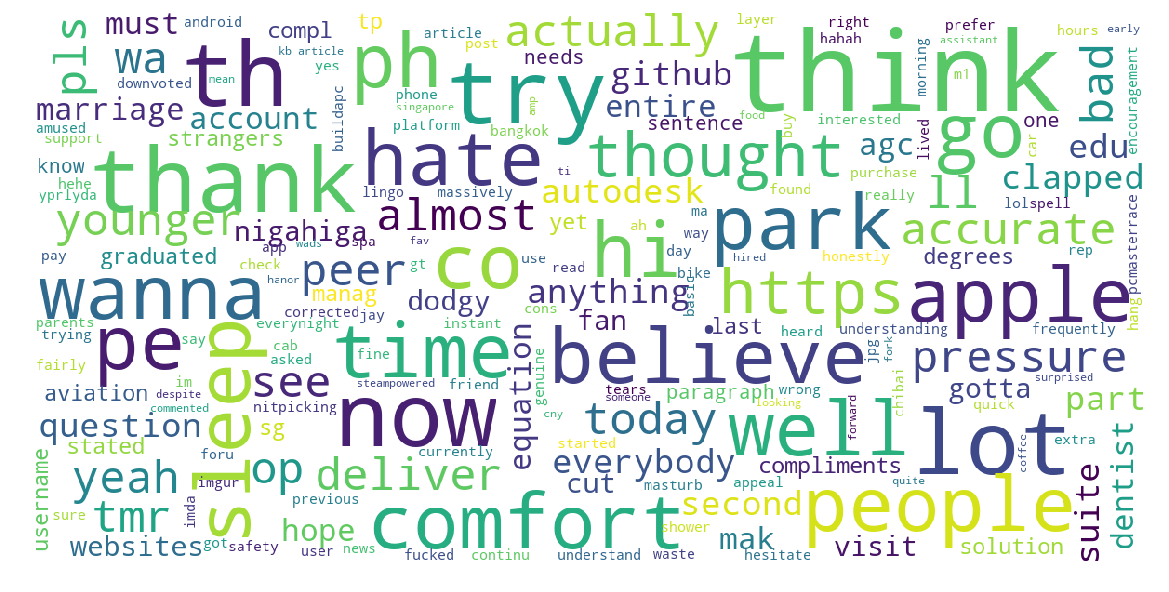

In [13]:
# generating a wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(comments_df["Comment"])

Looks like Reddit folks love saying "happy new year", "good", "guys", "boomz", and<br>
What is "dickwe"?<br><Br>

Some Singlish:<br>
orh<br>
racis<br>
damm<br>


In [11]:
# highest positive sentiment reviews
comments_df.sort_values("pos", ascending = False)[["Comment", "pos"]].head(10)

,Comment,pos
335938,true,1.0
769718,haha,1.0
721022,yes.,1.0
99660,yes,1.0
975714,d=,1.0
356748,awesome thanks!!,1.0
998524,lol,1.0
578202,hahaha,1.0
1030204,cool,1.0
199102,thx!,1.0


In [12]:
# highest lowest sentiment reviews
comments_df.sort_values("neg", ascending = False)[["Comment", "neg"]].head(10)

,Comment,neg
170154,bullshit.,1.0
221643,no,1.0
292859,no u,1.0
89110,no,1.0
877167,wtf?,1.0
751896,horrible. :/,1.0
797518,:( unfortunate,1.0
885058,no,1.0
84804,savage,1.0
928656,sadly no :(,1.0


I actually got laughed at aplenty when I use the terminology, "savage" when I was living in San Francisco. Not kidding, but in Singapore we use this term to denote negativity pretty often!